In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [36]:
ti= sns.load_dataset('titanic')
ti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='survived', ylabel='count'>

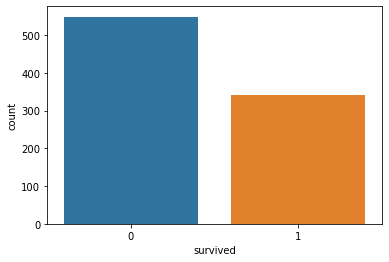

In [37]:
sns.countplot(x='survived',data=ti)

In [38]:
from pandas_profiling import profileReport
tips=sns.load_dataset('tips')
profile=ProfileReport()(tips,explorative=True)
profile.to_file("Output.html")

ModuleNotFoundError: No module named 'pandas_profiling'

In [39]:
print(ti.isnull().any().sum())

4


In [40]:
ti.dropna(inplace=True)

In [41]:
ti.shape[0]

182

In [42]:
#preprocessing
sex=pd.get_dummies(ti['sex'],drop_first=True)
sex[:5]

,male
1,0
3,0
6,1
10,0
11,0


In [43]:
cl=pd.get_dummies(ti['pclass'],drop_first=True)
cl[:5]

,2,3
1,0,0
3,0,0
6,0,0
10,0,1
11,0,0


In [44]:
embark=pd.get_dummies(ti['embarked'],drop_first=True)
embark[:5]

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [45]:
ti=pd.concat([ti,sex,cl,embark],axis=1)

In [46]:
ti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,male,2,3,Q,S
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,0,0,0,1
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1,0,0,0,1
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,0,0,1,0,1
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,0,0,0,0,1


In [47]:
ti.columns

Index([   'survived',      'pclass',         'sex',         'age',
             'sibsp',       'parch',        'fare',    'embarked',
             'class',         'who',  'adult_male',        'deck',
       'embark_town',       'alive',       'alone',        'male',
                   2,             3,           'Q',           'S'],
      dtype='object')

In [48]:
ti.drop(['pclass','sex','embarked','class','who','adult_male','deck','embark_town','alive','alone'],axis=1,inplace=True)

In [49]:
ti.head()

,survived,age,sibsp,parch,fare,male,2,3,Q,S
1,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,0,1
6,0,54.0,0,0,51.8625,1,0,0,0,1
10,1,4.0,1,1,16.7000,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,0,0,1


In [50]:
X=ti.drop(labels=['survived'],axis=1)
y=ti['survived']

In [51]:
X

,age,sibsp,parch,fare,male,2,3,Q,S
1,38.0,1,0,71.2833,0,0,0,0,0
3,35.0,1,0,53.1000,0,0,0,0,1
6,54.0,0,0,51.8625,1,0,0,0,1
10,4.0,1,1,16.7000,0,0,1,0,1
11,58.0,0,0,26.5500,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
871,47.0,1,1,52.5542,0,0,0,0,1
872,33.0,0,0,5.0000,1,0,0,0,1
879,56.0,0,1,83.1583,0,0,0,0,0
887,19.0,0,0,30.0000,0,0,0,0,1


In [52]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: survived, Length: 182, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.27,random_state=101)


In [56]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [57]:
lm.fit(X_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [58]:
print(lm.intercept_)

1.1218498344735548


In [59]:
print(lm.coef_)

[-0.00577906  0.00247209 -0.05878315  0.0005138  -0.47931585  0.04228123
  0.2521181  -0.20964815 -0.02328557]


In [60]:
coeff_df=pd.DataFrame(lm.coef_,index=X.columns,columns=['Coeffiecient(m)'])
coeff_df

,Coeffiecient(m)
age,-0.005779
sibsp,0.002472
parch,-0.058783
fare,0.000514
male,-0.479316
2,0.042281
3,0.252118
Q,-0.209648
S,-0.023286


In [61]:
 lr=LogisticRegression()
lr.fit(X_train,y_trai
       n)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
pred=lr.predict(X_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


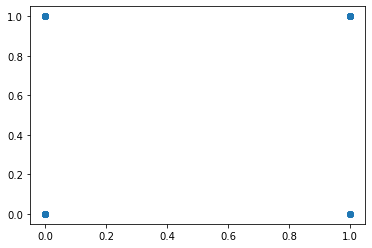

In [63]:
plt.scatter(y_test,pred)

In [64]:
pred[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)*100

76.0

In [67]:
lr.predict([[38.0,1,0,71.2833,0,0,0,0,0]])

array([1], dtype=int64)